## Refined HPF sky subtraction

The science and sky fibers in HPF have slightly different throughputs.  In this notebook we show how `muler` can automatically apply a calibration correction based on twilight sky flats.  We believe this change can reduce sky residuals by up to $14\times$ over the naive subtraction of the sky fiber.

In [1]:
%config InlineBackend.figure_format='retina'
from muler.hpf import HPFSpectrum

In [2]:
example_file = '../../data/HPF/Goldilocks_20210517T054403_v1.0_0060.spectra.fits'
spectrum = HPFSpectrum(file=example_file, order=19)

In [3]:
spectrum = spectrum.normalize()

We see the conspicuous blaze pattern in each spectra order.  Let's apply a correction to one of those orders:

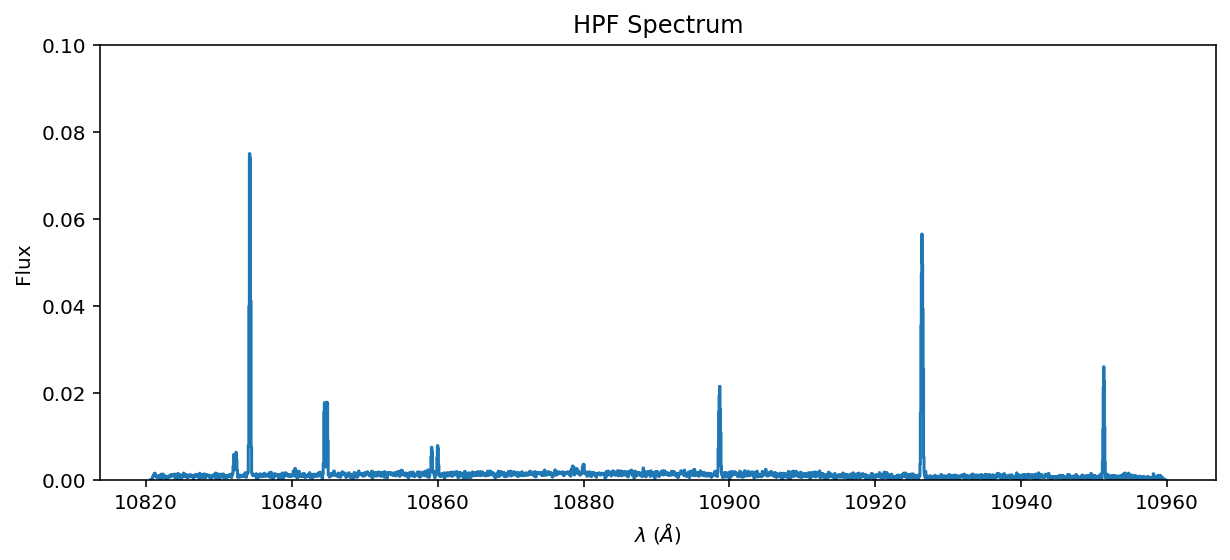

In [4]:
ax= spectrum.sky.plot(ylo=0, yhi=0.1);

These are the skylines we wish to remove.  Since the sky emission is **additive** it should always be the **first step** before dealing with multiplicative terms, such as the blaze or telluric absorption.

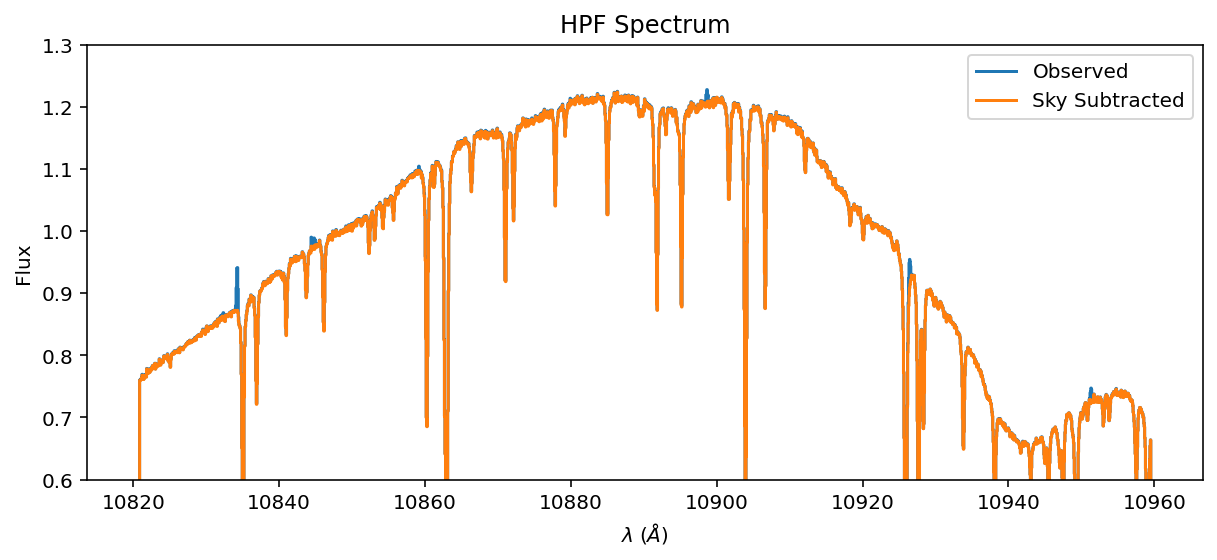

In [5]:
ax = spectrum.plot(ylo=0.6, yhi=1.3, label='Observed')
spectrum.sky_subtract(method='scalar').plot(ax=ax, label='Sky Subtracted')
ax.legend();

You can see that that the sky subtraction successfully removes the emission lines.  We can now proceed with deblazing:

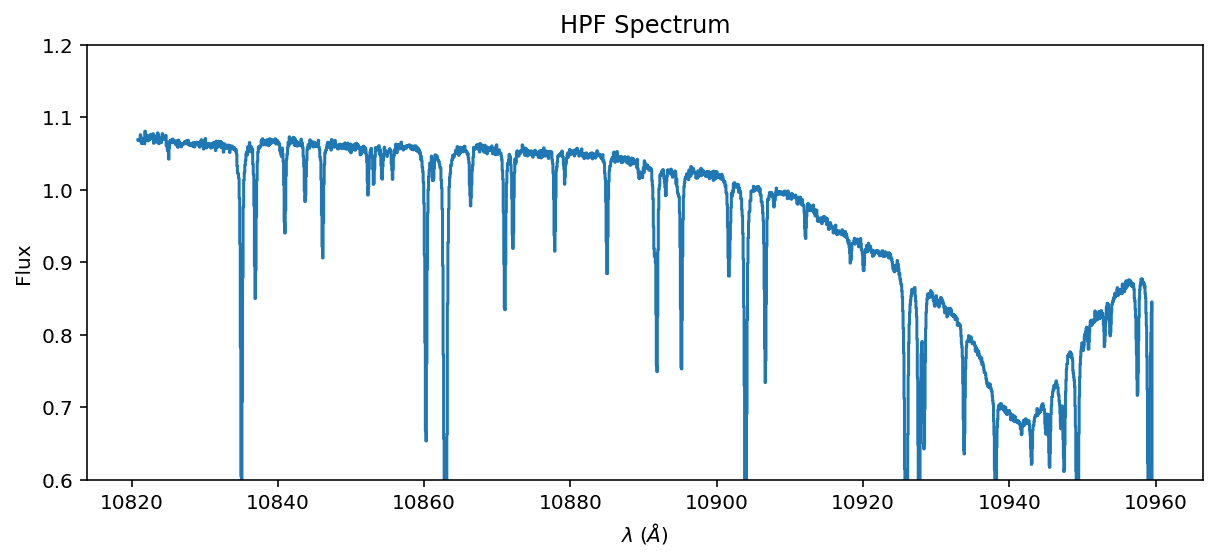

In [6]:
spectrum.sky_subtract(method='scalar').deblaze().normalize().plot();

Awesome!  Let's see if we can spot the differences among the three sky subtraction methods:

This method is known to oversubtract the sky, see GitHub Issues.
Experimental feature, report any Issues on GitHub


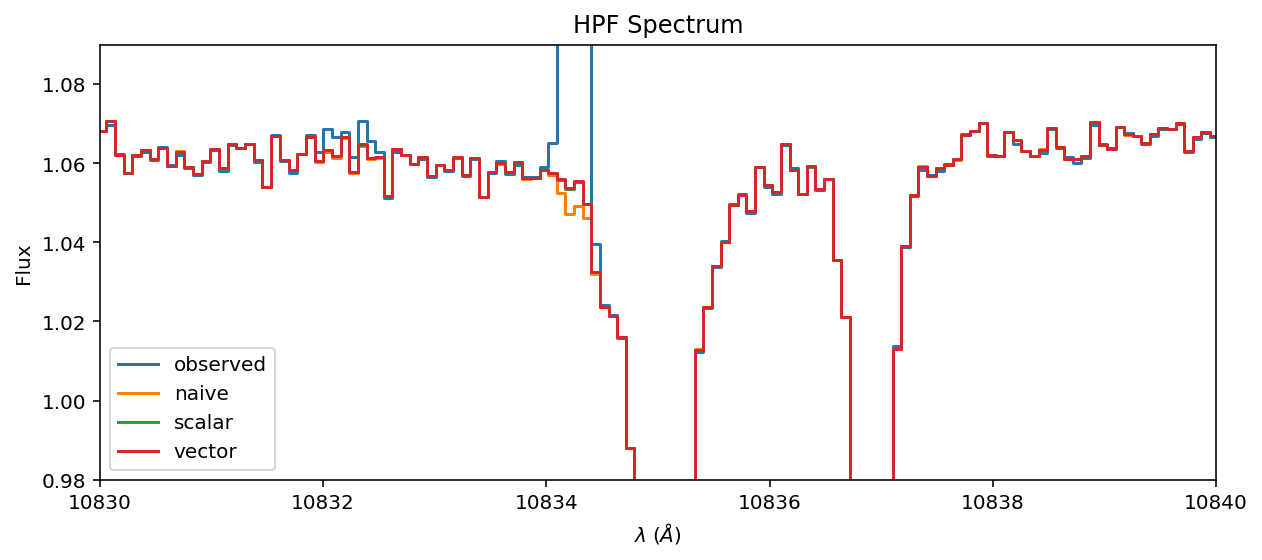

In [7]:
ax = spectrum.deblaze().normalize().plot(label='observed');
for method in ['naive', 'scalar', 'vector']:
    spectrum.sky_subtract(method=method).deblaze().normalize().plot(ax=ax, label=method);
    
ax.set_xlim(10_830, 10_840)
ax.set_ylim(0.98, 1.09)
ax.legend();

We see that the *naive* method oversubtracts the sky line, as we expected.  The `scalar` and `vector` methods appear to perform equally well for this source in this wavelength range.